# Assignment 4: Classification
## BUS 20800: Big Data
## Due: 11:59 am on Apr 29, 2022


---

# Part I

In [1]:
# Set up codes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
import random

import math

import warnings
warnings.filterwarnings('ignore')

## Problem 1. Curse of Dimensionality

### Problem 1.1 Understanding distance in high dimension

K-nn breaks down in high dimensions, and the phenomenon is commonly referred to as the curse of dimensionality (Bellman, 1961).

In this example, we will do some calculation and simulation experiment to help you understand the intuition.

Consider the nearest-neighbor procedure for inputs uniformly distributed
in a p-dimensional unit hypercube. Suppose we use a hypercubical neighborhood about a target point to capture a fraction r of the observations. 

Since this corresponds to a fraction r of the unit volume, what will the length of 
the expected edge $e_p \ (r)$ will be ? 

<img src="knn.png" alt="Drawing" style="width: 300px;" align="center"/>




**Answer**:


$e_{p}(r) = \displaystyle r^\frac{1}{p}$

Now let's fix r at 0.1, and set p =[1,2,3,5,10,100] calculate $e_p\ (r)$ numerically, respectively. What conclusions can you make?

**Answer**:

In [2]:
p =[1,2,3,5,10,100]
for x in p:
    print(0.1**(1/x))

0.1
0.31622776601683794
0.4641588833612779
0.6309573444801932
0.7943282347242815
0.9772372209558107


As p increases for a fixed r, the neighborhood edge length approaches the edge length of the unit hypercube.

Now let's fix p at 10, and set r = [0.1,0.2,...,0.6], calculate $e_p \ (r)$ numerically, respectively. What conclusions can you draw?

**Answer**:

In [3]:
r = [0.1,0.2,0.3,0.4,0.5,0.6]
for x in r:
    print(x**(1/10))

0.7943282347242815
0.8513399225207846
0.8865681505652133
0.9124435365554808
0.9330329915368074
0.9502002165056764


As r increases for a fixed p, the neighborhood edge length approaches the edge length of the unit hypercube.

Now let's formalize the above findings and run the following simulation experiment. 
Save your results in a dataframe called "Distance" below.

Set the index as the sequence of r and columns the sequence of p.

In [4]:
# Simulation experiment
p_seq = [1,2,3,5,10,100]
r = np.linspace(0,0.6,1000)

In [5]:
##############################################################################
### TODO: Calculate the expected edge e_p(r)                              ###
##############################################################################
df = pd.DataFrame(index = r, columns = p_seq)
Distance = df.apply(lambda x : x.index ** (1/x.name))
##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################

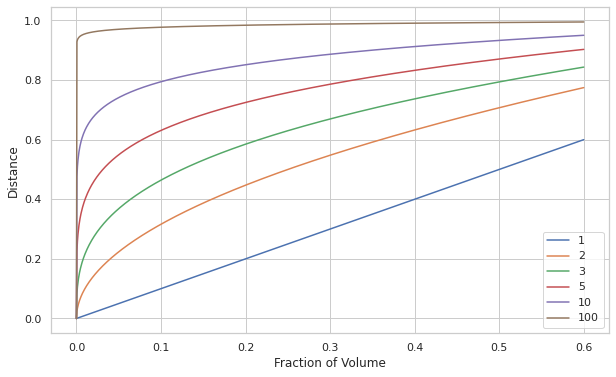

In [6]:
# Visualize your results
Distance.plot(figsize = (10,6))
plt.ylabel('Distance')
plt.xlabel('Fraction of Volume')
plt.show()

## Problem 1.2 K-nn in high dimension

Recall the essence of K-nn:

1. We assume the point's label is similar to its neighbours.
2. We need to have a good measure of distance.

From Problem 1.1, we can see that in a unit hypercube, even though we want to cover a small fraction of its volume, the expected edge $e_r \ (p)$ is no longer small. Hence, the points we need to cover are no longer 'local'. This might result in the failure of K-nn. 

Let's see this in the following simulation experiment.


### Experiment Setup

Suppose we have 1000 training examples $X_i$ generated uniformly on $[−1, 1]^p$. Assume that the true relationship between $X$ and $Y$ is

$$
Y = f(X) = e^{−8||X||^{2}}
$$

without any measurement error.

We use the 1-nn rule to predict $y_0$ at the test-point $X_{0} = 0$, and the true value of Y should be 1.

In [7]:
##############################################################################
### TODO: Calculate Y based on x input.                                    ###
##############################################################################
def f(x):
    return math.e ** (-8 * (np.linalg.norm(x) ** 2))
##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################

### DGP

Run the following cell to generate the simulated data. You don't need to modify any codes here.

In [8]:
def Generate_data(p):
    n_sample = 1000
    X = np.random.uniform(-1,1,(n_sample,p)).squeeze()
    
    return [f(x) for x in X]

Let's first visualize the results in 1-dimension and 2-dimension. After you finish the above codes, you can directly run the following codes. You don't need to modify any codes here.

### 2D Visualization for 1-dimensional X

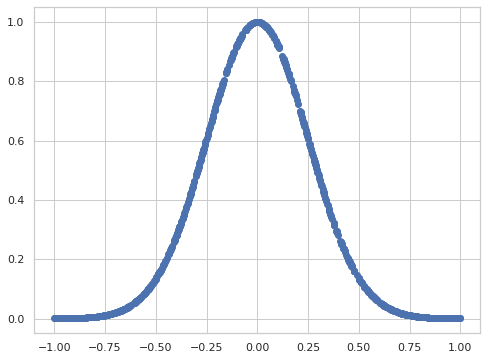

In [9]:
p = 1
n_sample = 1000
X = np.random.uniform(-1,1,(n_sample,p)).squeeze()
y = [f(x) for x in X]

plt.figure(figsize = (8,6))
plt.plot(X,y,'o')

### 3D Visualization for 2-dimensional X

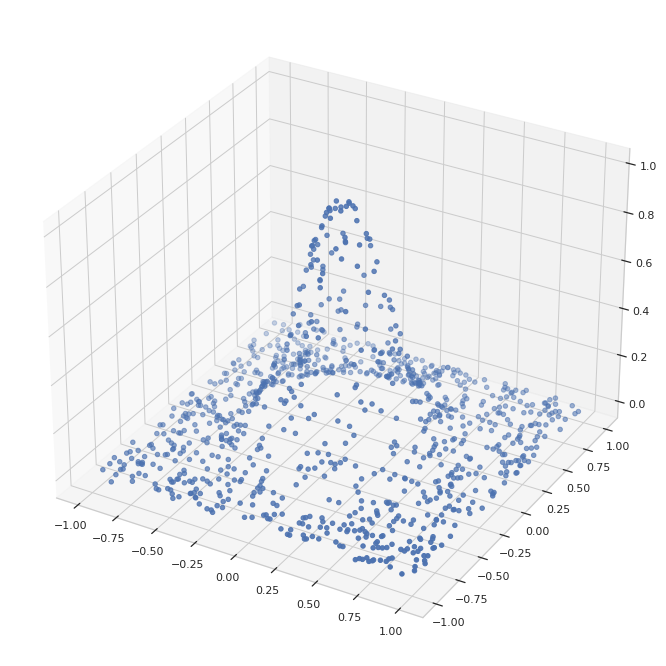

In [10]:
from mpl_toolkits.mplot3d import Axes3D

p = 2
X = np.random.uniform(-1,1,(n_sample,p)).squeeze()

fig = plt.figure(figsize = (12,12))
ax1 = plt.axes(projection='3d')

z = [f(x) for x in X]
x = X[:,0]
y = X[:,1]

ax1.scatter3D(x,y,z, cmap='Blues') 
plt.show()

### K-nn and MSE

Now set the dimension $p = [1,2,...,20]$, run this DGP 500 times and claculate the MSE $\frac{1}{500}\sum_{i=1}^{500} (1 - \widehat{f}(x_i))^2$ for 1-nn for each $p$, where $x_i$ is the closest point to the origin in each simulation. Visulize the MSE with respect to dimension $p$, and make comments on this graph. What did you find?

In [11]:
result = []
error = []

for p in range(20):

    for iter in range(500):
##############################################################################
### TODO: Calculate MSE for 1-nn, with different ps.                       ###
##############################################################################
        y = np.array(Generate_data(p))
        
        pass   
##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################

KeyboardInterrupt: 

**Answer**:

In [ ]:
result

## Problem 2. K-nn

## Problem 2.1: K-nn in classification: 


### Problem 2.1.0 : Play with this demo
http://vision.stanford.edu/teaching/cs231n-demos/knn/

This interactive demo is from Stanford, CS231-n. Play with it to build your intuition on K-nn.

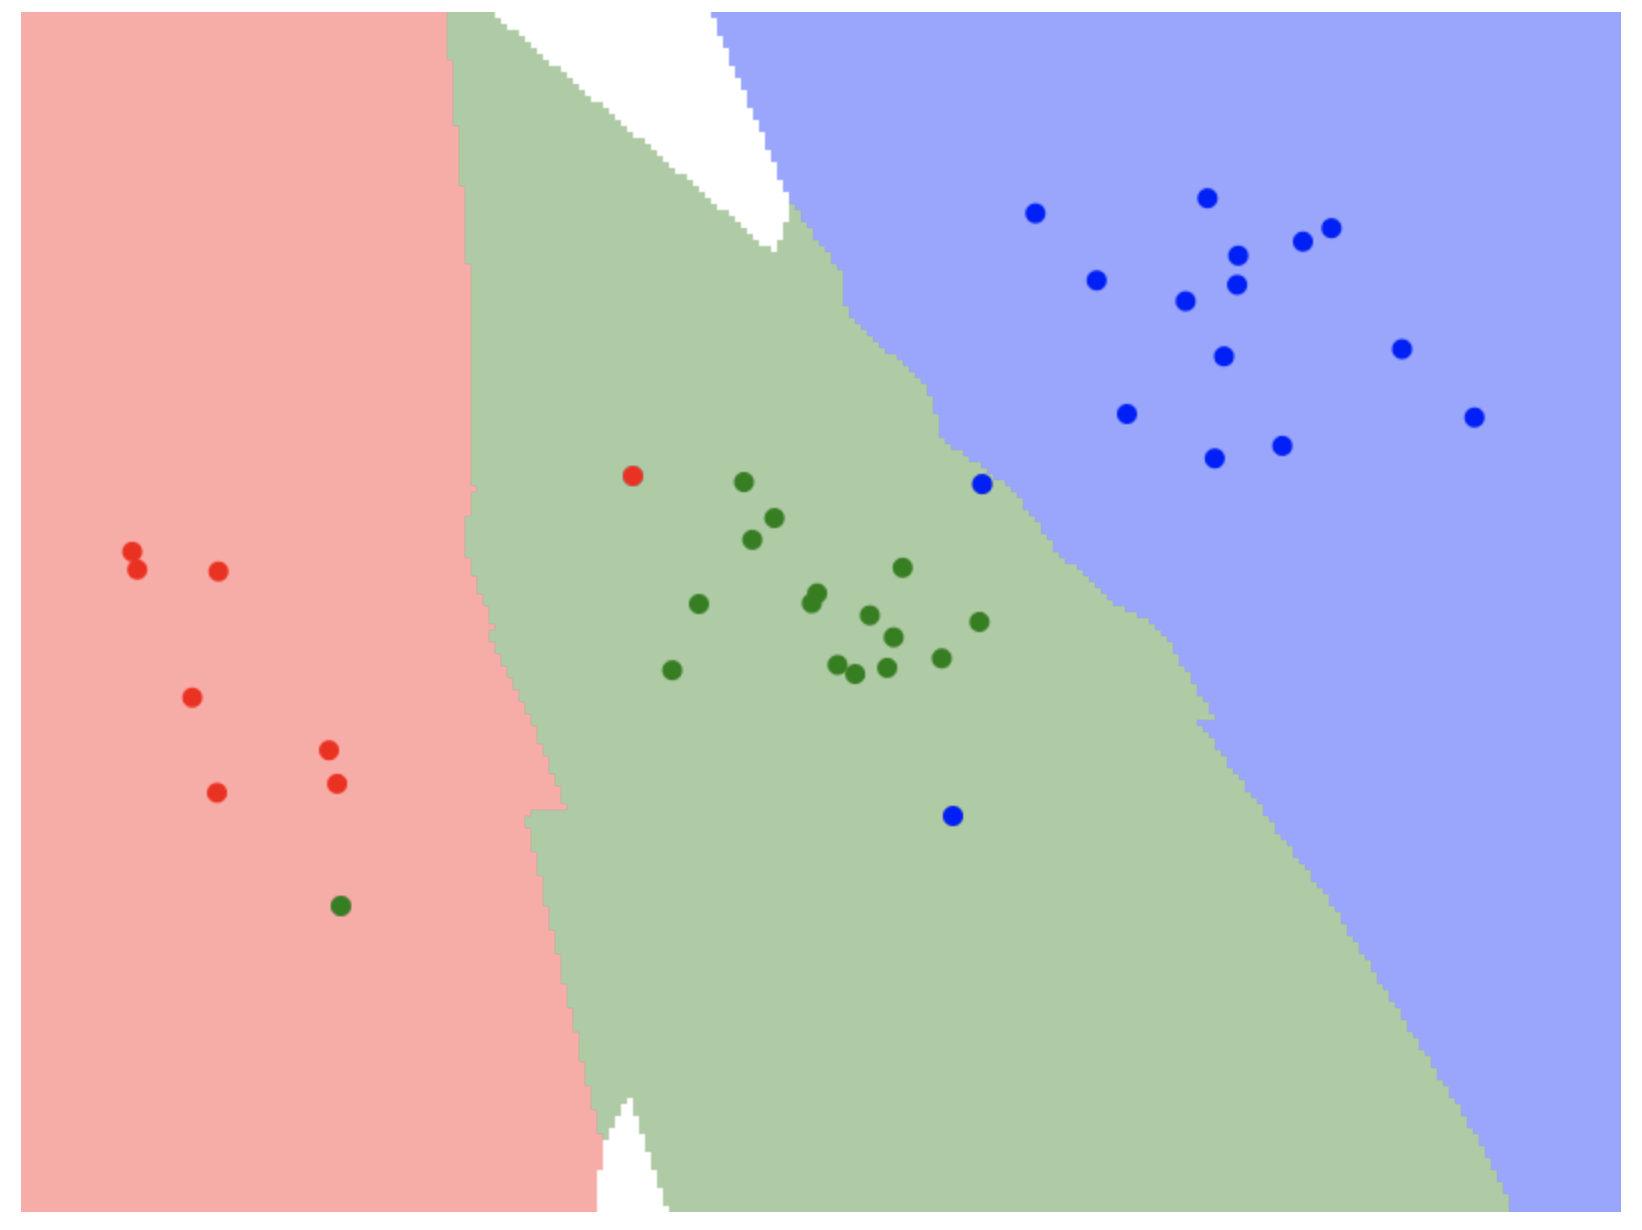

## Problem 2.1.1 : K-nn with simulated data

In this exercise, we will use the moon shape, circle shape and the balanced linearly seperable data in Assignment 2. And then realize K-nn algoritgm to visualize the decision boundary.

### DGP

Run the following codes to get the simualted data, you don't need to modify any codes here.

In [ ]:
# DGP

from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn import neighbors

from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(0)

n_samples = 1500

# Generate data    
noisy_circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)
balanced = make_blobs(n_samples=n_samples, random_state=8,centers=2,center_box = (-10,10))



### Circle shape data

Seperate the data into training sample and testing sample. 

(use variable name 'X_train', 'X_test', 'y_train', 'y_test', respectively)

And then fit a K-nn model (named 'clf') on your training set, predict the label in the testing set.

In [ ]:
# Circle shape dataset
X,y = noisy_circles

##############################################################################
### TODO: Realize k-nn in classification task.                             ###
##############################################################################

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.7)

n_neighbors = 10

# Fit the K-nn model
clf = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors, n_jobs = -1).fit(X_train,y_train)
    
##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################


Visualize the results, run the following cells and you don't need to modify any codes here.

Please make sure you name the defined variables, model as above.

In [ ]:
h = .02  # step size in the mesh


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),                         
                     np.arange(y_min, y_max, h))


# Put the result into a color plot
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training and testing points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,
            edgecolor='k', s=20, marker='^')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)"
          % (n_neighbors))
print("{:<40} {:.4f}".format("Train Score:", clf.score(X_train, y_train)))
print("{:<40} {:.4f}".format("Test Score:", clf.score(X_test, y_test)))

plt.show()


### Moon shape dataset

Seperate the data into training sample and testing sample. 

(use variable name 'X_train', 'X_test', 'y_train', 'y_test', respectively)

And then fit a K-nn model (named 'clf') on your training set, predict the label in the testing set.

In [ ]:
# Moon shape dataset
X,y = noisy_moons

##############################################################################
### TODO: Realize k-nn in classification task.                             ###
##############################################################################

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.7)

n_neighbors = 3

# Fit the K-nn model
clf = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors, n_jobs = -1).fit(X_train,y_train)

##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################

Visualize the results, run the following cells and you don't need to modify any codes here.

Please make sure you name the defined variables, model as above.

In [ ]:
h = .02  # step size in the mesh


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),                         
                     np.arange(y_min, y_max, h))


# Put the result into a color plot
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training and testing points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,
            edgecolor='k', s=20, marker='^')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)"
          % (n_neighbors))
print("{:<40} {:.4f}".format("Train Score:", clf.score(X_train, y_train)))
print("{:<40} {:.4f}".format("Test Score:", clf.score(X_test, y_test)))

plt.show()


### Linear seperatable dataset

Seperate the data into training sample and testing sample. 

(use variable name 'X_train', 'X_test', 'y_train', 'y_test', respectively)

And then fit a K-nn model (named 'clf') on your training set, predict the label in the testing set.

In [ ]:
# Linear seperatable dataset
X,y = balanced

##############################################################################
### TODO: Realize k-nn in classification task.                             ###
##############################################################################


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.7)

n_neighbors = 2

# Fit the K-nn model
clf = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors, n_jobs = -1).fit(X_train,y_train)

##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################

Visualize the results, run the following cells and you don't need to modify any codes here.

Please make sure you do not change the name of the variable so that the code below can run.

In [ ]:
h = .02  # step size in the mesh


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),                         
                     np.arange(y_min, y_max, h))


# Put the result into a color plot
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training and testing points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,
            edgecolor='k', s=20, marker='^')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)"
          % (n_neighbors))
print("{:<40} {:.4f}".format("Train Score:", clf.score(X_train, y_train)))
print("{:<40} {:.4f}".format("Test Score:", clf.score(X_test, y_test)))

plt.show()



## K-nn in regression:

K-nn can also be used in regression. See the following explaination.

**What we want in theory**:

Recall in the regression setting (not necessarily linear) with square loss, the optimal f that minimize:
$$
L(Y,f(X)) = [Y-f(X)]^2
$$

is $f_{opt} = \mathbb{E}(Y|X=x)$.

**What we do in practice:**

Unfortunately, we can't in general use this formula. And in linear setting, we have this assumption:

$$
\mathbb{E}(Y|X=x) = x'\beta 
$$


This is so-called a *parametric* method. 


As for k-NN regression, it estimates $\mathbb{E}(Y|X=x)$ based on local averaging, it's a *non-parametric* method.

$$
\hat{Y}(x) = \hat{E}(Y | X = x) = \frac{1}{k}\sum_{i = 1}^ky(X_{N_i{(x)}})
$$



### Part 2.2.1 Data Generating Process (DGP)


Condiser the following DGP: $y = sin(x) + 0.2 \times \varepsilon$ where $\varepsilon$ is the standard Gaussian noise. Run the following cell and you don't need to modify any codes here.

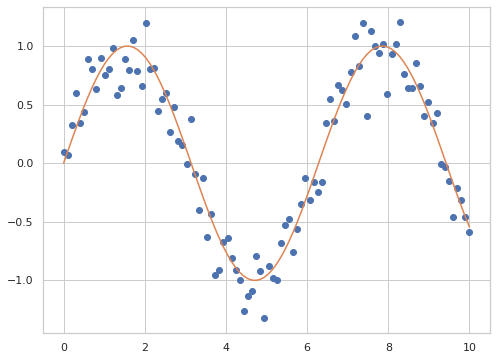

In [40]:
# DPG 
np.random.seed(42)

N = 100
noise = 0.2

# Generate y = sin(x)
x = np.linspace(0, N, N, endpoint=True) / 10
y = np.sin(x) 

# Add noise term
y += noise * np.random.normal(0, 1, N)

plt.figure(figsize = (8,6))
plt.plot(x, y, 'o')
plt.plot(x, np.sin(x))
plt.show()


### Part 2.2.2 Fit the K-nn regression

Please fit a K-nn estimator to this dataset and visualize the fitted regression line with different Ks. Finish the codes in Knn_experiment.py and run the folllowing cells.

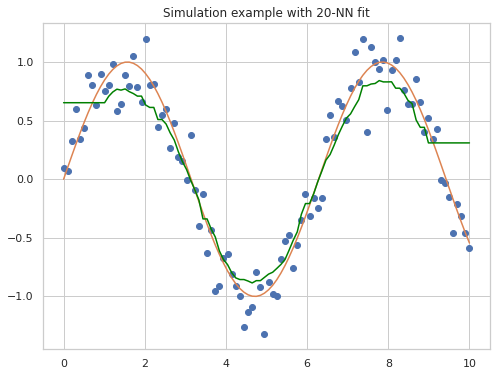

In [38]:
# Perform K-nn regression
from Knn_regression import *


# Try to play with different K
k = 20

Knn_visualize(x.reshape(-1,1),y,k)


Based on the visualization results, can you answer the following questions?

+ Is K-nn regression linear?

K-nn can be non-linear, as seen through k = 1 to k = 99. It can also be linear, as seen with k = 100. This is due to its non-parametric regression nature

+ As K increases, does the fitted regression line become smoother or not?

As K increases, the fitted regression line does become smoother

## Problem 3: Face completion

In this exerceise, we compare different methods on the task of face completion. The goal is to predict the lower half of a face given its upper half using different algorithm.

### Part 3.1 Data preprocessing

In this dataset, we have 40 people each with 10 different facial photographs (400 graphs in total). And each graph's pixels are in 64 $\times$ 64 dimension.


Run the following cells and load the face dataset. You can see the data descriprion as below, and you don't need to modify any codes here.



+ data   : flattened vector of these images, dimension 400 $\times$ 4096.
+ target : label of each person, from 0-39, 40 classes in total.

In [43]:
# Load the faces datasets

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

data, targets = fetch_olivetti_faces(return_X_y=True)

In [48]:
# Train test set split
# Use the first 30 people as our training set, and the last 10 as ouur testing data.

train = data[targets < 30]
test = data[targets >= 30]  

In [44]:
# Choose 5 graphs from the total test set for visualization purpose. These are five full faces.

n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

Run the following cells to visualize the true face.

In [45]:
# Seperate each graph into the upper half and lower half.

n_pixels = data.shape[1]
X_train = train[:, : (n_pixels + 1) // 2]
y_train = train[:, n_pixels // 2 :]

X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

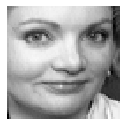

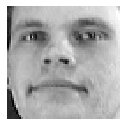

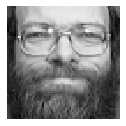

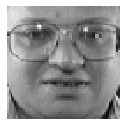

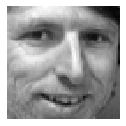

In [46]:
image_shape = (64, 64)
for i in range(1,6):
    plt.figure(figsize = (12,12))
    plt.subplot(5,1,i)
    true_face = np.hstack((X_test[i-1], y_test[i-1]))
    plt.axis("off")
    plt.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

### Part 3.2 Model training

In this section, you will compare the results of K-nn, linear regression, and ridge. Note that this is a multi-dimensional regression problem, where each pixel in the lower half the image is a y variable that you need run regression with. In other words, the y variable is a matrix. 

In [62]:
# Fit estimators and store the information in a dictionary structure dataframe.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

ESTIMATORS = {
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV()
}


y_test_predict = dict()

{'K-nn', 'Linear regression', 'Ridge'}

Finish your codes in the following cells. You need to finish the training procedure for K-nn, linear regression and ridge. And use these models to get OOS prediction.

In [67]:
##############################################################################
### TODO: Fit K-nn, linear regression and ridge, and get OOS prediction    ###
##############################################################################
for name, estimator in ESTIMATORS.items():
    
    model = estimator.fit(data, targets).predict(data)
    y_test_predict[name] = model


##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################


In [68]:
y_test_predict

{'K-nn': array([ 6. ,  4.4,  9. , 18.8,  8. , 16.2,  6. , 10. ,  6.8,  9.6,  1. ,
         1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  9.8, 11.2,
        10.2,  5.8,  9.2, 13.6, 12.2, 13.4,  8.2, 12. ,  5.2,  7.4,  8. ,
        10.6, 14.4, 23. ,  9.2,  6.2,  8.6, 12.4,  9. , 10.6, 20.6,  6. ,
        17. , 10. , 13. ,  4. ,  4. , 18. , 11.8,  8.6,  8.4,  5. ,  5. ,
         5. ,  5. ,  5. ,  5. ,  5. ,  8.4, 10.8, 10.4,  5.6,  6. , 11.4,
         9.2,  8.4,  8.2,  6. ,  9.2,  7. ,  6.2,  7.8,  7.4,  7.4,  5.6,
         5.6, 13.2,  4.8,  8. , 12.2, 10.8,  8. ,  8. ,  8. , 17. ,  8. ,
         8. , 17. , 10.6, 15. , 13. , 12. ,  7.6,  8. , 10.2,  7.6, 28. ,
         8.6, 10. , 10. , 10. , 10. , 10. , 10. , 10. , 10. , 10. , 10. ,
        16.6, 16.6, 12.8,  9.8, 11. , 12.2, 11. , 13.8, 10.4,  9.2, 12.4,
        15.2, 16.4, 17.4, 12.8, 12.4, 11.8, 15.2, 11.6, 12.8, 13. , 13. ,
        13. , 13. , 13. , 13. , 13. , 13. , 13. , 13. , 14. , 14. , 14. ,
        14. , 14. , 14. , 14. 

### Part 3.3 Visualization

Run the following cells to visualize the facial prediction. You don't need to modify any codes here.

ValueError: cannot reshape array of size 2049 into shape (64,64)

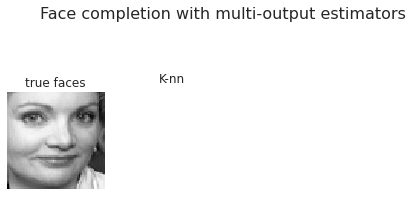

In [66]:
# Plot the completed faces

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()